               price                           date
count     366.000000                            366
mean   102509.887389  2025-05-13 11:59:56.125682944
min     76329.090356            2024-11-12 00:00:00
25%     95046.523328            2025-02-11 06:00:00
50%    103713.915381            2025-05-13 12:00:00
75%    110961.632438            2025-08-12 18:00:00
max    124773.508231            2025-11-11 23:36:22
std     11073.561322                            NaN


AttributeError: Rectangle.set() got an unexpected keyword argument 'title'

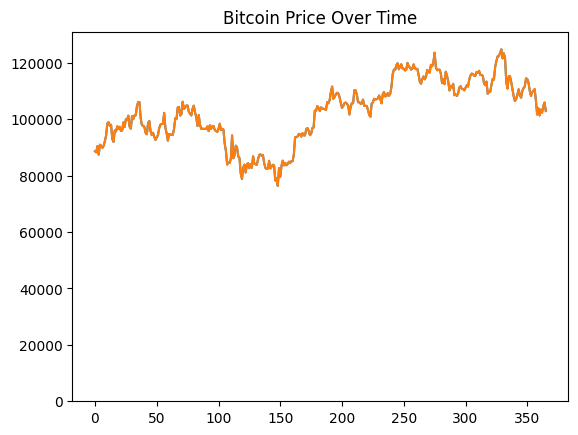

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '365',  # ~5 years
    'interval': 'daily'
}

r = requests.get(url, params=params)
data = r.json()

# print(data)

# convert data to dataframe(table) with two columns
prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
# print(prices)

# creates new 'date' column which takes the timestamp col, which is in ms, to an actaul date format
prices['date'] = pd.to_datetime(prices['timestamp'], unit='ms')
# print(prices)

# removes timestamp column, axis=1 = drop a column, axis=0 = drop a row
prices = prices.drop('timestamp', axis=1)
# print(prices)

# prices rename as dataframe for ease of use
df = prices

# Calculate metrics
print(df.describe())
df['return'] = df['price'].pct_change()
df['volatility'] = df['return'].rolling(30).std()
df['price'].plot()

# Plot
df['price'].plot(title='Bitcoin Price Over Time')
df['return'].hist(bins=50)
df['volatility'].plot(title='30-Day Rolling Volatility')
plt.title('Daily Returns Distribution')
plt.show()
